# Benchmark the Morris test function

In [1]:
import openturns as ot
import otbenchmark as otb
import openturns.viewer as otv

In [2]:
problem = otb.MorrisSensitivity()

In [3]:
print(problem)

name = Morris
distribution = ComposedDistribution(Uniform(a = 0, b = 1), Uniform(a = 0, b = 1), Uniform(a = 0, b = 1), Uniform(a = 0, b = 1), Uniform(a = 0, b = 1), Uniform(a = 0, b = 1), Uniform(a = 0, b = 1), Uniform(a = 0, b = 1), Uniform(a = 0, b = 1), Uniform(a = 0, b = 1), Uniform(a = 0, b = 1), Uniform(a = 0, b = 1), Uniform(a = 0, b = 1), Uniform(a = 0, b = 1), Uniform(a = 0, b = 1), Uniform(a = 0, b = 1), Uniform(a = 0, b = 1), Uniform(a = 0, b = 1), Uniform(a = 0, b = 1), Uniform(a = 0, b = 1), IndependentCopula(dimension = 20))
function = class=PythonEvaluation name=MorrisFunction
firstOrderIndices = [0.08,0.08,0.06,0.08,0.06,0.13,0.06,0.13,0.13,0.12,0,0,0,0,0,0,0,0,0,0]#20
totalOrderIndices = [0.11,0.11,0.06,0.11,0.06,0.13,0.06,0.13,0.13,0.12,0,0,0,0,0,0,0,0,0,0]#20


In [4]:
distribution = problem.getInputDistribution()
model = problem.getFunction()

In [5]:
# Exact first and total order
exact_first_order = problem.getFirstOrderIndices()
exact_first_order

class=Point name=Unnamed dimension=20 values=[0.08,0.08,0.06,0.08,0.06,0.13,0.06,0.13,0.13,0.12,0,0,0,0,0,0,0,0,0,0]

In [6]:
exact_total_order = problem.getTotalOrderIndices()
exact_total_order

class=Point name=Unnamed dimension=20 values=[0.11,0.11,0.06,0.11,0.06,0.13,0.06,0.13,0.13,0.12,0,0,0,0,0,0,0,0,0,0]

## Plot the function

In [7]:
# Create X/Y data
ot.RandomGenerator.SetSeed(0)
size = 200
inputDesign = ot.MonteCarloExperiment(distribution, size).generate()
outputDesign = model(inputDesign)

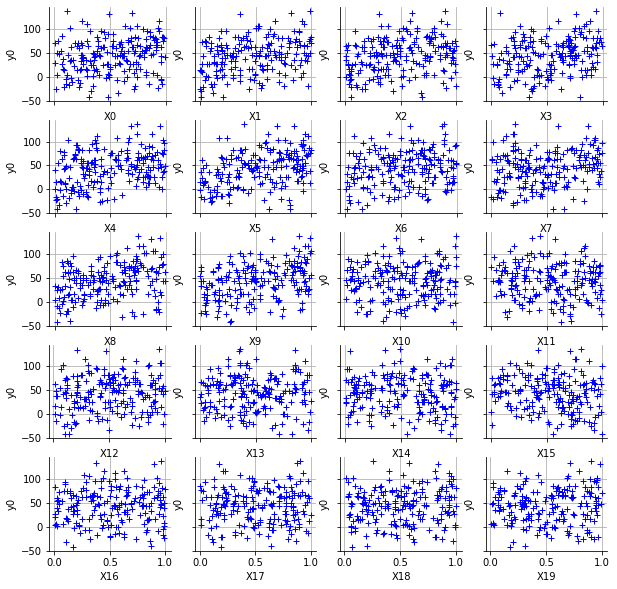

In [8]:
dimension = distribution.getDimension()
nbcolumns = 4
nbrows = int(dimension / nbcolumns)
grid = ot.GridLayout(nbrows, nbcolumns)
inputDescription = distribution.getDescription()
outputDescription = model.getOutputDescription()[0]
index = 0
for i in range(nbrows):
    for j in range(nbcolumns):
        graph = ot.Graph(
            "n=%d" % (size), inputDescription[index], outputDescription, True, ""
        )
        sample = ot.Sample(size, 2)
        sample[:, 0] = inputDesign[:, index]
        sample[:, 1] = outputDesign[:, 0]
        cloud = ot.Cloud(sample)
        graph.add(cloud)
        grid.setGraph(i, j, graph)
        index += 1
view = otv.View(grid, figure_kw={"figsize": (10.0, 10.0)})

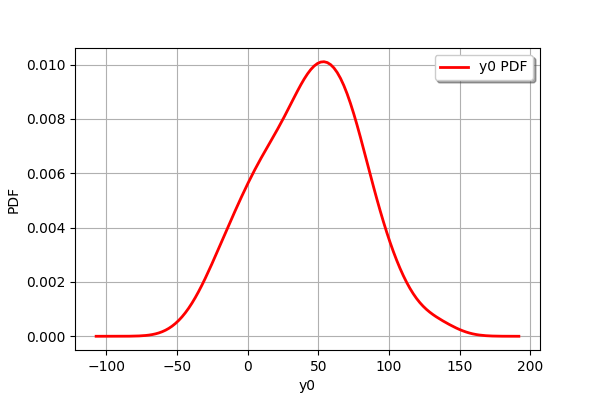

In [9]:
output_distribution = ot.KernelSmoothing().build(outputDesign)
output_distribution.drawPDF()

## Perform sensitivity analysis

In [10]:
# Create X/Y data
ot.RandomGenerator.SetSeed(0)
size = 30
inputDesign = ot.SobolIndicesExperiment(distribution, size).generate()
outputDesign = model(inputDesign)

In [11]:
# Compute first order indices using the Saltelli estimator
sensitivityAnalysis = ot.SaltelliSensitivityAlgorithm(inputDesign, outputDesign, size)
computed_first_order = sensitivityAnalysis.getFirstOrderIndices()
computed_total_order = sensitivityAnalysis.getTotalOrderIndices()

In [12]:
# Compare with exact results
print("Sample size : ", size)
# First order
# Compute absolute error (the LRE cannot be computed,
# because S can be zero)
print("Computed first order = ", computed_first_order)
print("Exact first order = ", exact_first_order)
# Total order
print("Computed total order = ", computed_total_order)
print("Exact total order = ", exact_total_order)

Sample size :  30
Computed first order =  [0.0607395,0.20637,0.267428,0.262258,0.314109,0.61827,0.294943,0.439378,0.246433,0.274413,0.221509,0.18807,0.218819,0.228214,0.208058,0.215507,0.23585,0.21719,0.237087,0.214426]#20
Exact first order =  [0.08,0.08,0.06,0.08,0.06,0.13,0.06,0.13,0.13,0.12,0,0,0,0,0,0,0,0,0,0]#20
Computed total order =  [0.0311589,0.22498,0.219259,0.078154,-0.0539979,-0.0392477,-0.0216198,0.20086,0.311105,0.0877451,-0.0160964,-0.000247103,-0.0276497,0.000406818,-0.0165498,-0.0183569,-0.0308313,-0.0264689,-0.00283312,-0.00660521]#20
Exact total order =  [0.11,0.11,0.06,0.11,0.06,0.13,0.06,0.13,0.13,0.12,0,0,0,0,0,0,0,0,0,0]#20


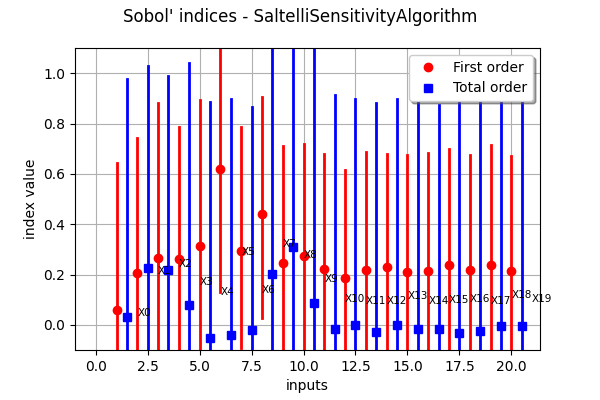

In [13]:
sensitivityAnalysis.draw()